In [ ]:
import os
import numpy as np 
from astropy.table import Table
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# read PROVABGS parent sample 

In [4]:
dat_dir = '/Users/chahah/data/provabgs/'
bgs = Table.read(os.path.join(dat_dir, 'provabgs.sv3.empty.fits'))

In [21]:
bgs.colnames

['TARGETID',
 'FIBER',
 'LOCATION_AVAIL',
 'RA',
 'DEC',
 'REF_EPOCH',
 'PARALLAX',
 'PMRA',
 'PMDEC',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'SV3_SCND_TARGET',
 'NUMOBS_MORE',
 'NUMOBS',
 'ZTILEID',
 'TARGET_STATE',
 'TIMESTAMP',
 'VERSION',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLU

Text(0, 0.5, '$r$-band magnitude')

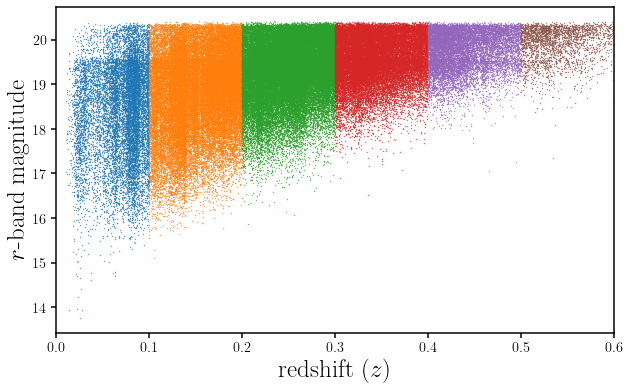

In [26]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)
for zlim in [(0., 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6)]: 
    in_zlim = (bgs['Z'] > zlim[0]) & (bgs['Z'] < zlim[1])
    sub.scatter(bgs['Z'][in_zlim], 22.5 - 2.5 * np.log10(bgs['FLUX_R'][in_zlim]), s=0.1)
sub.set_xlabel('redshift ($z$)', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_ylabel('$r$-band magnitude', fontsize=25)

# read $\log M_*$ inferred from SBI fit to DESI photometry

In [6]:
logm_inf = np.load(os.path.join(dat_dir, 'provabgs.sv3.cnf_sbi.posteriors.logm.npy'))

(7.5, 13.0)

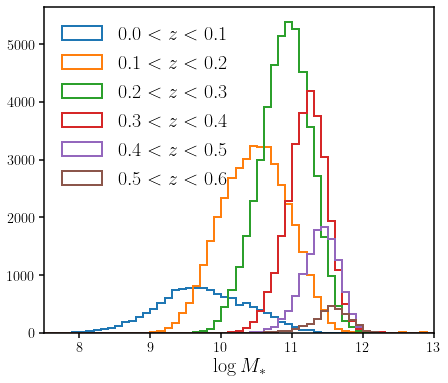

In [19]:
fig = plt.figure(figsize=(7,6))
sub = fig.add_subplot(111)
for zlim in [(0., 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6)]: 
    in_zlim = (bgs['Z'] > zlim[0]) & (bgs['Z'] < zlim[1])
    _ = sub.hist(logm_inf[in_zlim,2], range=(7, 13), bins=60, histtype='step', linewidth=2, 
                 label=r'$%.1f < z < %.1f$' % (zlim[0], zlim[1]))
sub.legend(loc='upper left', fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=20)
sub.set_xlim(7.5, 13.)

Text(0.3, 8, 'PROVABGS-SV3 SBI v0')

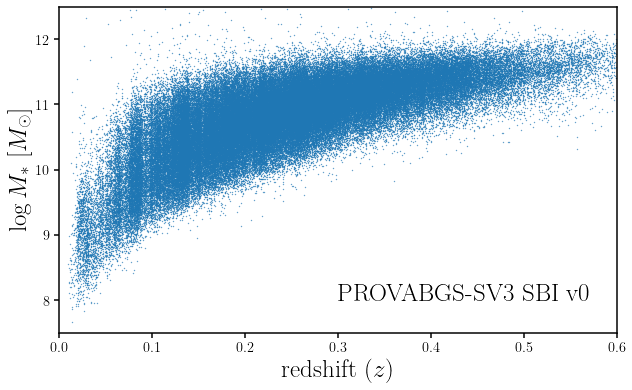

In [33]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)
sub.scatter(bgs['Z'], logm_inf[:,2], s=0.1)
sub.set_xlabel('redshift ($z$)', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_ylabel('$\log M_*$ [$M_\odot$]', fontsize=25)
sub.set_ylim(7.5, 12.5)
sub.text(0.3, 8, 'PROVABGS-SV3 SBI v0', fontsize=25)

In [34]:
bgs['logMstar_median'] = logm_inf[:,2]
bgs['logMstar_m2sig'] = logm_inf[:,0]
bgs['logMstar_m1sig'] = logm_inf[:,1]
bgs['logMstar_p1sig'] = logm_inf[:,3]
bgs['logMstar_p2sig'] = logm_inf[:,4]

In [35]:
bgs.write(os.path.join(dat_dir, 'provabgs.sv3.sbi.v0.fits'))